In [3]:

import tensorflow as tf
import warnings

# Suppress TensorFlow deprecated warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)  # Correct usage
warnings.filterwarnings('ignore')

# Rest of your code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras import layers, models


In [4]:
data = pd.read_csv(r"/content/Agriculture Export Products.csv")

In [22]:
def clean_and_convert(x):
    if isinstance(x, str):
        return float(x.replace(',', '').replace(' ', ''))
    return float(x)

In [23]:
df = df.applymap(clean_and_convert)

<ipython-input-23-3d9c4ceca961>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(clean_and_convert)


In [33]:
pip install numpy pandas matplotlib tensorflow


In [39]:
pip install numpy pandas matplotlib tensorflow scikit-learn


In [45]:
pip install pandas numpy tensorflow matplotlib scikit-learn


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.2113
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.1271
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.1121
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - loss: 0.1071
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 0.1044
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.1007
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0999
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0983
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0974
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0961
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 0.0956
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - loss: 0.0945
Epoch 13/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 0.0941
Epoch 14/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0940
Epoch 15/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0932

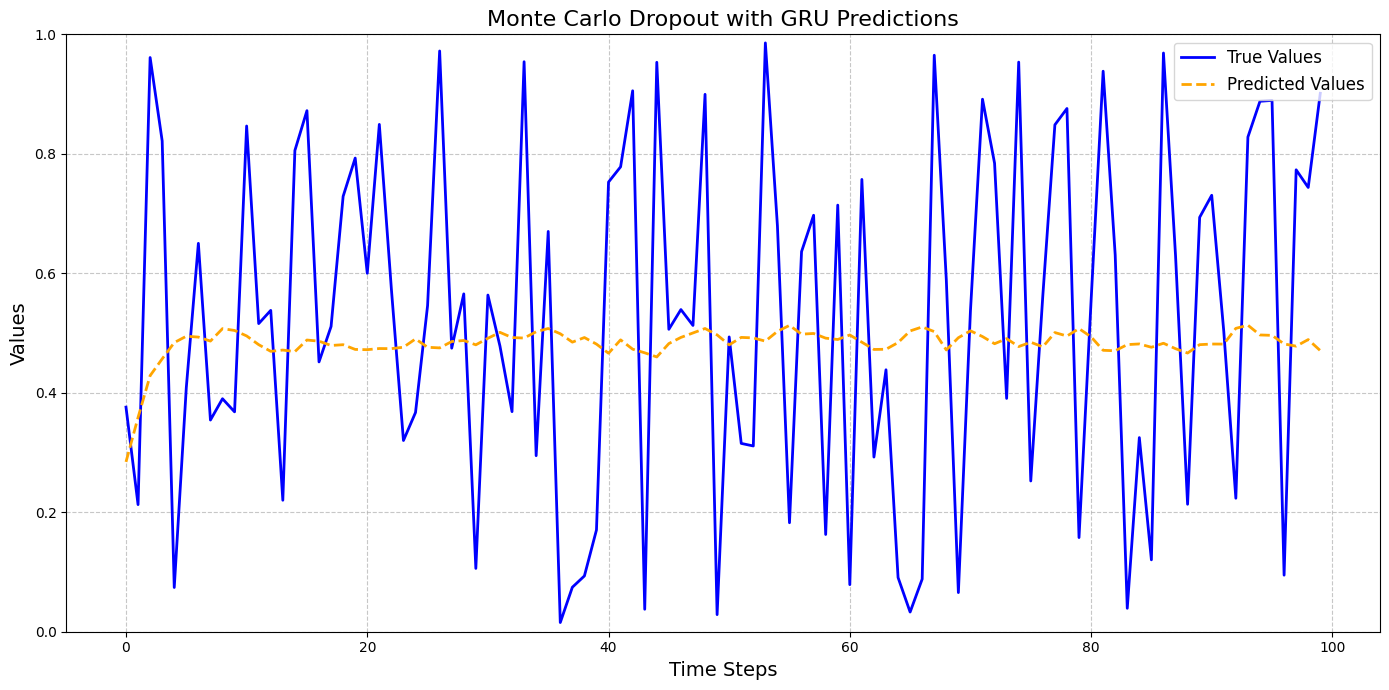

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense

# Generate synthetic data with the correct shape
def generate_data(samples, timesteps, features):
    x = np.random.rand(samples, timesteps, features)  # Shape (samples, timesteps, features)
    y = np.random.rand(samples, timesteps)  # Shape (samples, timesteps)
    return x, y

# Create the model with Monte Carlo Dropout
def create_model(input_shape):
    model = Sequential()
    model.add(GRU(64, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.5))  # Monte Carlo Dropout
    model.add(GRU(32, return_sequences=True))  # Ensure output for each timestep
    model.add(Dropout(0.5))  # Monte Carlo Dropout
    model.add(Dense(1))  # Output layer
    return model

# Monte Carlo Dropout prediction function
def predict_with_monte_carlo(model, x, n_iterations=100):
    predictions = []
    for _ in range(n_iterations):
        pred = model(x, training=True)  # Enable dropout during prediction
        predictions.append(pred.numpy())
    return np.mean(predictions, axis=0)

# Parameters
samples = 500  # Increased number of samples for training
timesteps = 100
features = 10

# Generate data with correct shapes
x_train, y_train = generate_data(samples, timesteps, features)
x_test, y_test = generate_data(1, timesteps, features)  # One sample for testing

# Create and compile the model
model = create_model((timesteps, features))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=32)  # Increased epochs and batch size for better training

# Predict with Monte Carlo Dropout
predictions = predict_with_monte_carlo(model, x_test.reshape(1, timesteps, features))

# Reshape predictions for consistent plotting
y_test_reshaped = y_test.flatten()  # Flatten for plotting
predictions_reshaped = predictions.flatten()  # Flatten predictions for plotting

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(y_test_reshaped, label='True Values', color='blue', linestyle='-', linewidth=2)
plt.plot(predictions_reshaped, label='Predicted Values', color='orange', linestyle='--', linewidth=2)
plt.title('Monte Carlo Dropout with GRU Predictions', fontsize=16)
plt.xlabel('Time Steps', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.ylim(0, 1)  # Set y-limits for better visibility
plt.show()
